# IMPORT LIBRARIES

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import seaborn as sns
import pickle

# IMPORT DATASET

In [81]:
data = pd.read_csv("baby-weights-dataset2.csv")
data.describe()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
count,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,...,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000
mean,52700.500000,1.485671,1.303817,30.174477,30.283037,12.436943,27.736312,12.926893,13.256489,2.378462,...,0.013767,0.050039,0.003807,0.003738,0.005680,0.008856,0.002189,0.003777,0.003442,7.258066
std,29271.802985,0.500349,0.459907,6.775576,13.615401,3.728901,5.957369,2.926569,2.932693,1.490272,...,0.116524,0.218027,0.061581,0.061022,0.075155,0.093689,0.046739,0.061342,0.058566,1.329461
min,2001.000000,1.000000,1.000000,14.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500
25%,27350.750000,1.000000,1.000000,25.000000,21.000000,10.000000,23.000000,12.000000,12.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.625000
50%,52700.500000,1.000000,1.000000,30.000000,30.000000,12.000000,28.000000,12.000000,13.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.375000
75%,78050.250000,2.000000,2.000000,35.000000,39.000000,15.000000,32.000000,16.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.062500
max,103400.000000,9.000000,2.000000,74.000000,98.000000,49.000000,53.000000,17.000000,17.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.062500


# DATA PROCESSING & EXPLORATION

In [82]:
data.shape
data["MARITAL"].unique
data.head()


,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26,10,34,12,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40,10,18,11,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16,14,31,16,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40,15,28,12,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60,13,20,12,14,2,...,0,1,0,0,0,0,0,0,0,9.0000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        101400 non-null  int64  
 1   SEX       101400 non-null  int64  
 2   MARITAL   101400 non-null  int64  
 3   FAGE      101400 non-null  int64  
 4   GAINED    101400 non-null  int64  
 5   VISITS    101400 non-null  int64  
 6   MAGE      101400 non-null  int64  
 7   FEDUC     101400 non-null  int64  
 8   MEDUC     101400 non-null  int64  
 9   TOTALP    101400 non-null  int64  
 10  BDEAD     101400 non-null  int64  
 11  TERMS     101400 non-null  int64  
 12  LOUTCOME  101400 non-null  int64  
 13  WEEKS     101400 non-null  int64  
 14  RACEMOM   101400 non-null  int64  
 15  RACEDAD   101400 non-null  int64  
 16  HISPMOM   101400 non-null  object 
 17  HISPDAD   101400 non-null  object 
 18  CIGNUM    101400 non-null  int64  
 19  DRINKNUM  101400 non-null  int64  
 20  ANEM

In [84]:
duplicate_rows_df = data[data.duplicated()]
print(f"number of duplicate rows:{ duplicate_rows_df.shape}")

number of duplicate rows:(0, 37)


In [85]:
data["BWEIGHT"].describe()

count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

# VISUALIZATION

(array([5.7000e+01, 2.6700e+02, 3.4400e+02, 4.0200e+02, 6.2400e+02,
        1.0100e+03, 1.9450e+03, 4.0370e+03, 9.3740e+03, 1.8477e+04,
        2.7642e+04, 2.0396e+04, 1.1026e+04, 4.1670e+03, 1.2310e+03,
        3.1200e+02, 7.0000e+01, 1.5000e+01, 4.0000e+00, 0.0000e+00]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. ]),
 <BarContainer object of 20 artists>)

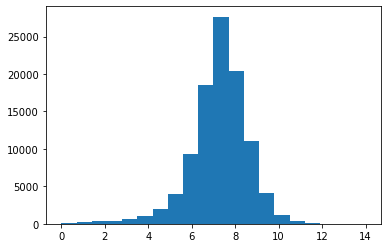

In [86]:
plt.hist(data["BWEIGHT"],bins= 20,range=[0,14])

<AxesSubplot:xlabel='BWEIGHT'>

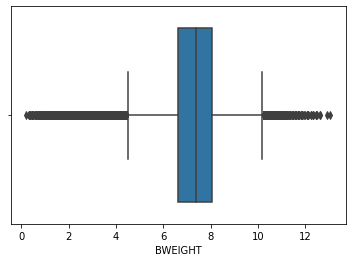

In [87]:
sns.boxplot(x=data["BWEIGHT"])

In [88]:
print("Skewness: %f" % data['BWEIGHT'].skew())
print("Kurtosis: %f" % data['BWEIGHT'].kurt())

Skewness: -0.936593
Kurtosis: 2.868780


# QUALITATIVE & QUANTITATIVE CATAGORIES

In [89]:
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative.remove('BWEIGHT')
quantitative.remove('ID')
categorial = [f for f in data.columns if data.dtypes[f] == 'object']
print('quantitative :',quantitative)
print('qualitative :',categorial)

quantitative : ['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM', 'RACEDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE']
qualitative : ['HISPMOM', 'HISPDAD']


In [90]:
print(data.isnull().sum())

ID          0
SEX         0
MARITAL     0
FAGE        0
GAINED      0
VISITS      0
MAGE        0
FEDUC       0
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       0
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      0
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      0
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
BWEIGHT     0
dtype: int64


# MISSING VALUE CORRECTION

In [91]:
for c in categorial:
    data[c] = data[c].astype('category')
    print(data[c])
    if data[c].isnull().any():
        data[c] = data[c].cat.add_categories(['MISSING'])
        data[c] = data[c].fillna('MISSING')
        print(data[c])

0         M
1         N
2         N
3         N
4         N
         ..
101395    M
101396    N
101397    N
101398    N
101399    N
Name: HISPMOM, Length: 101400, dtype: category
Categories (7, object): ['C', 'M', 'N', 'O', 'P', 'S', 'U']
0         M
1         N
2         N
3         N
4         N
         ..
101395    M
101396    N
101397    N
101398    N
101399    N
Name: HISPDAD, Length: 101400, dtype: category
Categories (7, object): ['C', 'M', 'N', 'O', 'P', 'S', 'U']


# ENCODING QUALITATIVE CATAGORIES

In [92]:
#Encode the qualitative variable as HISPMOM_E and HISPDAD_E
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'BWEIGHT']].groupby(feature).mean()['BWEIGHT']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
cat_encoded = []
for q in categorial:  
    encode(data, q)
    cat_encoded.append(q+'_E')
print(cat_encoded)
type(categorial)

['HISPMOM_E', 'HISPDAD_E']


list

In [93]:
Feature = quantitative + cat_encoded
new_data = data[Feature]

# FINDING CORRELATION FOR BEST ATTRIBUTES

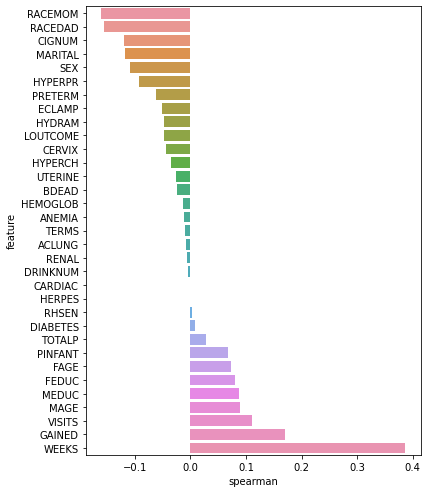

In [94]:
def spearman(frame, Feature):
    spr = pd.DataFrame()
    spr['feature'] = Feature
    spr['spearman'] = [frame[f].corr(frame['BWEIGHT'], 'spearman') for f in Feature]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(Feature)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    return 
Feature = quantitative 
spearman(data, Feature)

In [95]:
Correlated_Feature = ["WEEKS","GAINED","RACEMOM","RACEDAD","VISITS","MAGE","MEDUC","CIGNUM","MARITAL","SEX"]
new_data = new_data[Correlated_Feature]
new_data.head()


,WEEKS,GAINED,RACEMOM,RACEDAD,VISITS,MAGE,MEDUC,CIGNUM,MARITAL,SEX
0,35,26,1,1,10,34,4,0,1,2
1,41,40,1,1,10,18,12,0,2,2
2,39,16,1,1,14,31,16,0,1,2
3,38,40,8,1,15,28,12,0,1,1
4,40,60,2,2,13,20,14,0,2,1


# SPLITTING DATASET

In [96]:
from sklearn.model_selection import train_test_split
ATrain, ATest = train_test_split(new_data, test_size=0.2, random_state=12345)
BTrain, BTest = train_test_split(data[["BWEIGHT"]], test_size=0.2, random_state=12345)
print(BTest.head(10))
ATrain.shape

       BWEIGHT
1072    8.8125
65946   6.0000
70393   6.7500
2599   10.4375
67617   7.3750
32787   6.0000
10894   7.4375
95293   7.1875
23073   8.3125
42819   7.6250


(81120, 10)

# APPLYING LINEAR REGRESSION

In [97]:
reg = LinearRegression()
reg.fit(ATrain,BTrain)

LinearRegression()

In [98]:
print(reg.intercept_)
print(reg.coef_)

[-4.17005105]
[[ 0.29355879  0.01142737 -0.0381102  -0.04378209  0.00809627  0.01815995
  -0.00988332 -0.03314977 -0.17627039 -0.2626519 ]]


In [99]:
BPred = reg.predict(ATest)
print(min(BPred))
print(max(BPred))

[0.21593914]
[9.61734902]


In [100]:
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, BPred))

BWEIGHT    1.054987
dtype: float64


# ERROR ANALYSIS

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(BTest, BPred))  
print('Mean Squared Error:', metrics.mean_squared_error(BTest, BPred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(BTest, BPred)))

Mean Absolute Error: 0.8248882946284117
Mean Squared Error: 1.1129980311534882
Root Mean Squared Error: 1.0549872184787303


# MAKING GUI BY TKINTER FOR REAL-TIME ANALYSIS

In [102]:
import tkinter as tk

In [103]:
from tkinter import ttk,messagebox

In [104]:
win = tk.Tk()

# GUI FEATURES , LOADING MODEL & PREDICTION

In [105]:
win.title("FETUS WEIGHT PREDICTION")
win.geometry("500x500")
#Column 1
WEEKS=ttk.Label(win,text="WEEKS")
WEEKS.place(x=20,y=20)
WEEKS_var=tk.StringVar()
WEEKS_entrybox=ttk.Entry(win,width=50,textvariable=WEEKS_var)
WEEKS_entrybox.place(x=100,y=20)
#Column 2
GAINED=ttk.Label(win,text="GAINED")
GAINED.place(x=20,y=50)
GAINED_var=tk.StringVar()
GAINED_entrybox=ttk.Entry(win,width=50,textvariable=GAINED_var)
GAINED_entrybox.place(x=100,y=50)
#Column 3
RACEMOM=ttk.Label(win,text="RACEMOM")
RACEMOM.place(x=20,y=80)
RACEMOM_var=tk.StringVar()
RACEMOM_entrybox=ttk.Entry(win,width=50,textvariable=RACEMOM_var)
RACEMOM_entrybox.place(x=100,y=80)
#Column 4
RACEDAD=ttk.Label(win,text="RACEDAD")
RACEDAD.place(x=20,y=110)
RACEDAD_var=tk.StringVar()
RACEDAD_entrybox=ttk.Entry(win,width=50,textvariable=RACEDAD_var)
RACEDAD_entrybox.place(x=100,y=110)
#Column 5
VISITS=ttk.Label(win,text="VISITS")
VISITS.place(x=20,y=140)
VISITS_var=tk.StringVar()
VISITS_entrybox=ttk.Entry(win,width=50,textvariable=VISITS_var)
VISITS_entrybox.place(x=100,y=140)
#Column 6
MAGE=ttk.Label(win,text="MAGE")
MAGE.place(x=20,y=170)
MAGE_var=tk.StringVar()
MAGE_entrybox=ttk.Entry(win,width=50,textvariable=MAGE_var)
MAGE_entrybox.place(x=100,y=170)
#Column 7
MEDUC=ttk.Label(win,text="MEDUC")
MEDUC.place(x=20,y=200)
MEDUC_var=tk.StringVar()
MEDUC_entrybox=ttk.Entry(win,width=50,textvariable=MEDUC_var)
MEDUC_entrybox.place(x=100,y=200)
#Column 8
CIGNUM=ttk.Label(win,text="CIGNUM")
CIGNUM.place(x=20,y=230)
CIGNUM_var=tk.StringVar()
CIGNUM_entrybox=ttk.Entry(win,width=50,textvariable=CIGNUM_var)
CIGNUM_entrybox.place(x=100,y=230)
#Column 9
MARITAL=ttk.Label(win,text="MARITAL")
MARITAL.place(x=20,y=260)
MARITAL_var=tk.StringVar()
MARITAL_entrybox=ttk.Entry(win,width=50,textvariable=MARITAL_var)
MARITAL_entrybox.place(x=100,y=260)
#Column 10
SEX=ttk.Label(win,text="SEX")
SEX.place(x=20,y=290)
SEX_var=tk.StringVar()
SEX_entrybox=ttk.Entry(win,width=50,textvariable=SEX_var)
SEX_entrybox.place(x=100,y=290)
OUT_var=tk.StringVar()
OUT_entrybox=ttk.Entry(win,width=50,textvariable=OUT_var)
OUT_entrybox.place(x=100,y=400)

def data_gather():
    Weeks=float(WEEKS_var.get())
    Gained=float(GAINED_var.get())
    Racemom=float(RACEMOM_var.get())
    Racedad=float(RACEDAD_var.get())
    Visits=float(VISITS_var.get())
    Mage=float(MAGE_var.get())
    Meduc=float(MEDUC_var.get())
    Cignum=float(CIGNUM_var.get())
    Marital=float(MARITAL_var.get())
    Sex=float(SEX_var.get())
    final = [Weeks,Gained,Racemom,Racedad,Visits,Mage,Meduc,Cignum,Marital,Sex]
    return final

def Output():
    global final_value
    test1 = [data_gather()]
    final_value = reg.predict(test1)
    OUT_entrybox.insert(0,final_value[0])
    print(final_value[0])
    

Predict_button=ttk.Button(win,text="Predict",command=Output)
Predict_button.place(x=200,y=350)
win.mainloop()

[2.88837079]
